In [4]:
%pip install "zenml[server]"

!zenml integration install openai -y
import IPython

# automatically restart kernel
IPython.Application.instance().kernel.do_shutdown(restart=True)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
⠦ Installing integrations...Requirement already satisfied: openai>=0.27.0 in /home/wjayesh/slackbot/lib/python3.9/site-packages (0.27.2)
⠇ Installing integrations...Requirement already satisfied: PyYAML>=5.3 in /home/wjayesh/slackbot/lib/python3.9/site-packages (from langchain>=0.0.116) (6.0.1)
⠏ Installing integrations...Requirement already satisfied: greenlet!=0.4.17 in /home/wjayesh/slackbot/lib/python3.9/site-packages (from SQLAlchemy<3,>=1.4->langchain>=0.0.116) (2.0.2)
⠙ Installing integrations...Requirement already satisfied: packaging>=17.0 in /home/wjayesh/slackbot/lib/python3.9/site-packages (from marshmallow<4.0.0,>=3.18.0->dataclasses-json<0.6.0,>=0.5.7->langchain>=0.0.1

{'status': 'ok', 'restart': True}

: 

**Note**: You need an [ngrok account](https://dashboard.ngrok.com/signup) to be able to view the ZenML Dashboard later. Please set up an account, then set your user token below:

In [ ]:
NGROK_TOKEN = (
    ""  # TODO: set your ngrok token since you're working on an online notebook
)

In [ ]:
!pip install pyngrok
!ngrok authtoken {NGROK_TOKEN}

In [4]:
!zenml version

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.

        )                    *      (     
     ( /(                  (  `     )\ )  
     )\())    (            )\))(   (()/(  
    ((_)\    ))\    (     ((_)()\   /(_)) 
     _((_)  /((_)   )\ )  (_()((_) (_))   
    |_  /  (_))    _(_/(  |  \/  | | |    
     / /   / -_)  | ' \)) | |\/| | | |__  
    /___|  \___|  |_||_|  |_|  |_| |____| 
    
version: 0.47.0


In [7]:
%pip install -e ~/apps/zenml[server]

Obtaining file:///home/wjayesh/apps/zenml
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
Checking if build backend supports build_editable ... done
  Building editable for zenml (pyproject.toml) ... done
  Created wheel for zenml: filename=zenml-0.47.0-py3-none-any.whl size=11177 sha256=90e9992db942e0e1c596173204b5e8f568de1d8dba3dc1baa718e65c72167698
  Stored in directory: /tmp/pip-ephem-wheel-cache-9j81m69n/wheels/d1/f1/54/c0a0c45507a3f8878c132f0834a0fe67bf43a9f40063dae9d4
Successfully built zenml
  Attempting uninstall: zenml
    Found existing installation: zenml 0.47.0
    Uninstalling zenml-0.47.0:
      Successfully uninstalled zenml-0.47.0
Note: you may need to restart the kernel to use updated packages.


### 🍡 The case for an ML Pipeline

As an ML practitioner, you are probably familiar with building ML models using Scikit-learn, PyTorch, TensorFlow, or similar. An ML Pipeline is simply an extension, including other steps you would typically do before or after building a model, like data acquisition, preprocessing, model deployment, or monitoring. The ML pipeline essentially defines a step-by-step procedure of your work as an ML practitioner. Defining ML pipelines explicitly in code is great because:

- We can easily rerun all of our work, not just the model, eliminating bugs and making our models easier to reproduce.
- Data and models can be versioned and tracked, so we can see at a glance which dataset a model was trained on and how it compares to other models.
- With caching, you can skip steps that have already been run, making it easy to work with large datasets and experiment quickly.
- If the entire pipeline is coded up, we can automate many operational tasks, like retraining and redeploying models when the underlying problem or data changes or rolling out new and improved models with CI/CD workflows.

Having a clearly defined ML pipeline is essential for ML teams that aim to serve models on a large scale.

### 🧘 ZenML Setup
We will define our ML pipelines using ZenML. It is an excellent tool for this task, as it is straightforward and intuitive to use and has integrations with most of the advanced MLOps tools we might want to use laterin our MLOps journey. Make sure you have ZenML installed (via pip install zenml). Next, let's run some commands to make sure you start with a fresh ML stack.

In [1]:
!rm -rf .zen
!zenml init

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
Setting the repo active workspace to 'default'.
Setting the repo active stack to default.
⠋ Initializing ZenML repository at /home/wjayesh/apps/zenml-rag-llm-finetune.
ZenML repository initialized at /home/wjayesh/apps/zenml-rag-llm-finetune.
⠋ Initializing ZenML repository at /home/wjayesh/apps/zenml-rag-llm-finetune.
⠋ Initializing ZenML repository at /home/wjayesh/apps/zenml-rag-llm-finetune.

The local active stack was initialized to 'default'. This local configuration 
will only take effect when you're running ZenML from the initialized repository 
root, or from a subdirectory. For more information on repositories and 
configurations, please visit 
https://docs.zenml.io/user-guide/starter-guide/understand-stacks.


#### Stack
A [stack](https://docs.zenml.io/user-guide/starter-guide/understand-stacks) in ZenML is the combination of tools and infrastructure that your pipelines can run on. When you run ZenML code without configuring a stack, the pipeline will run on the so-called default stack.

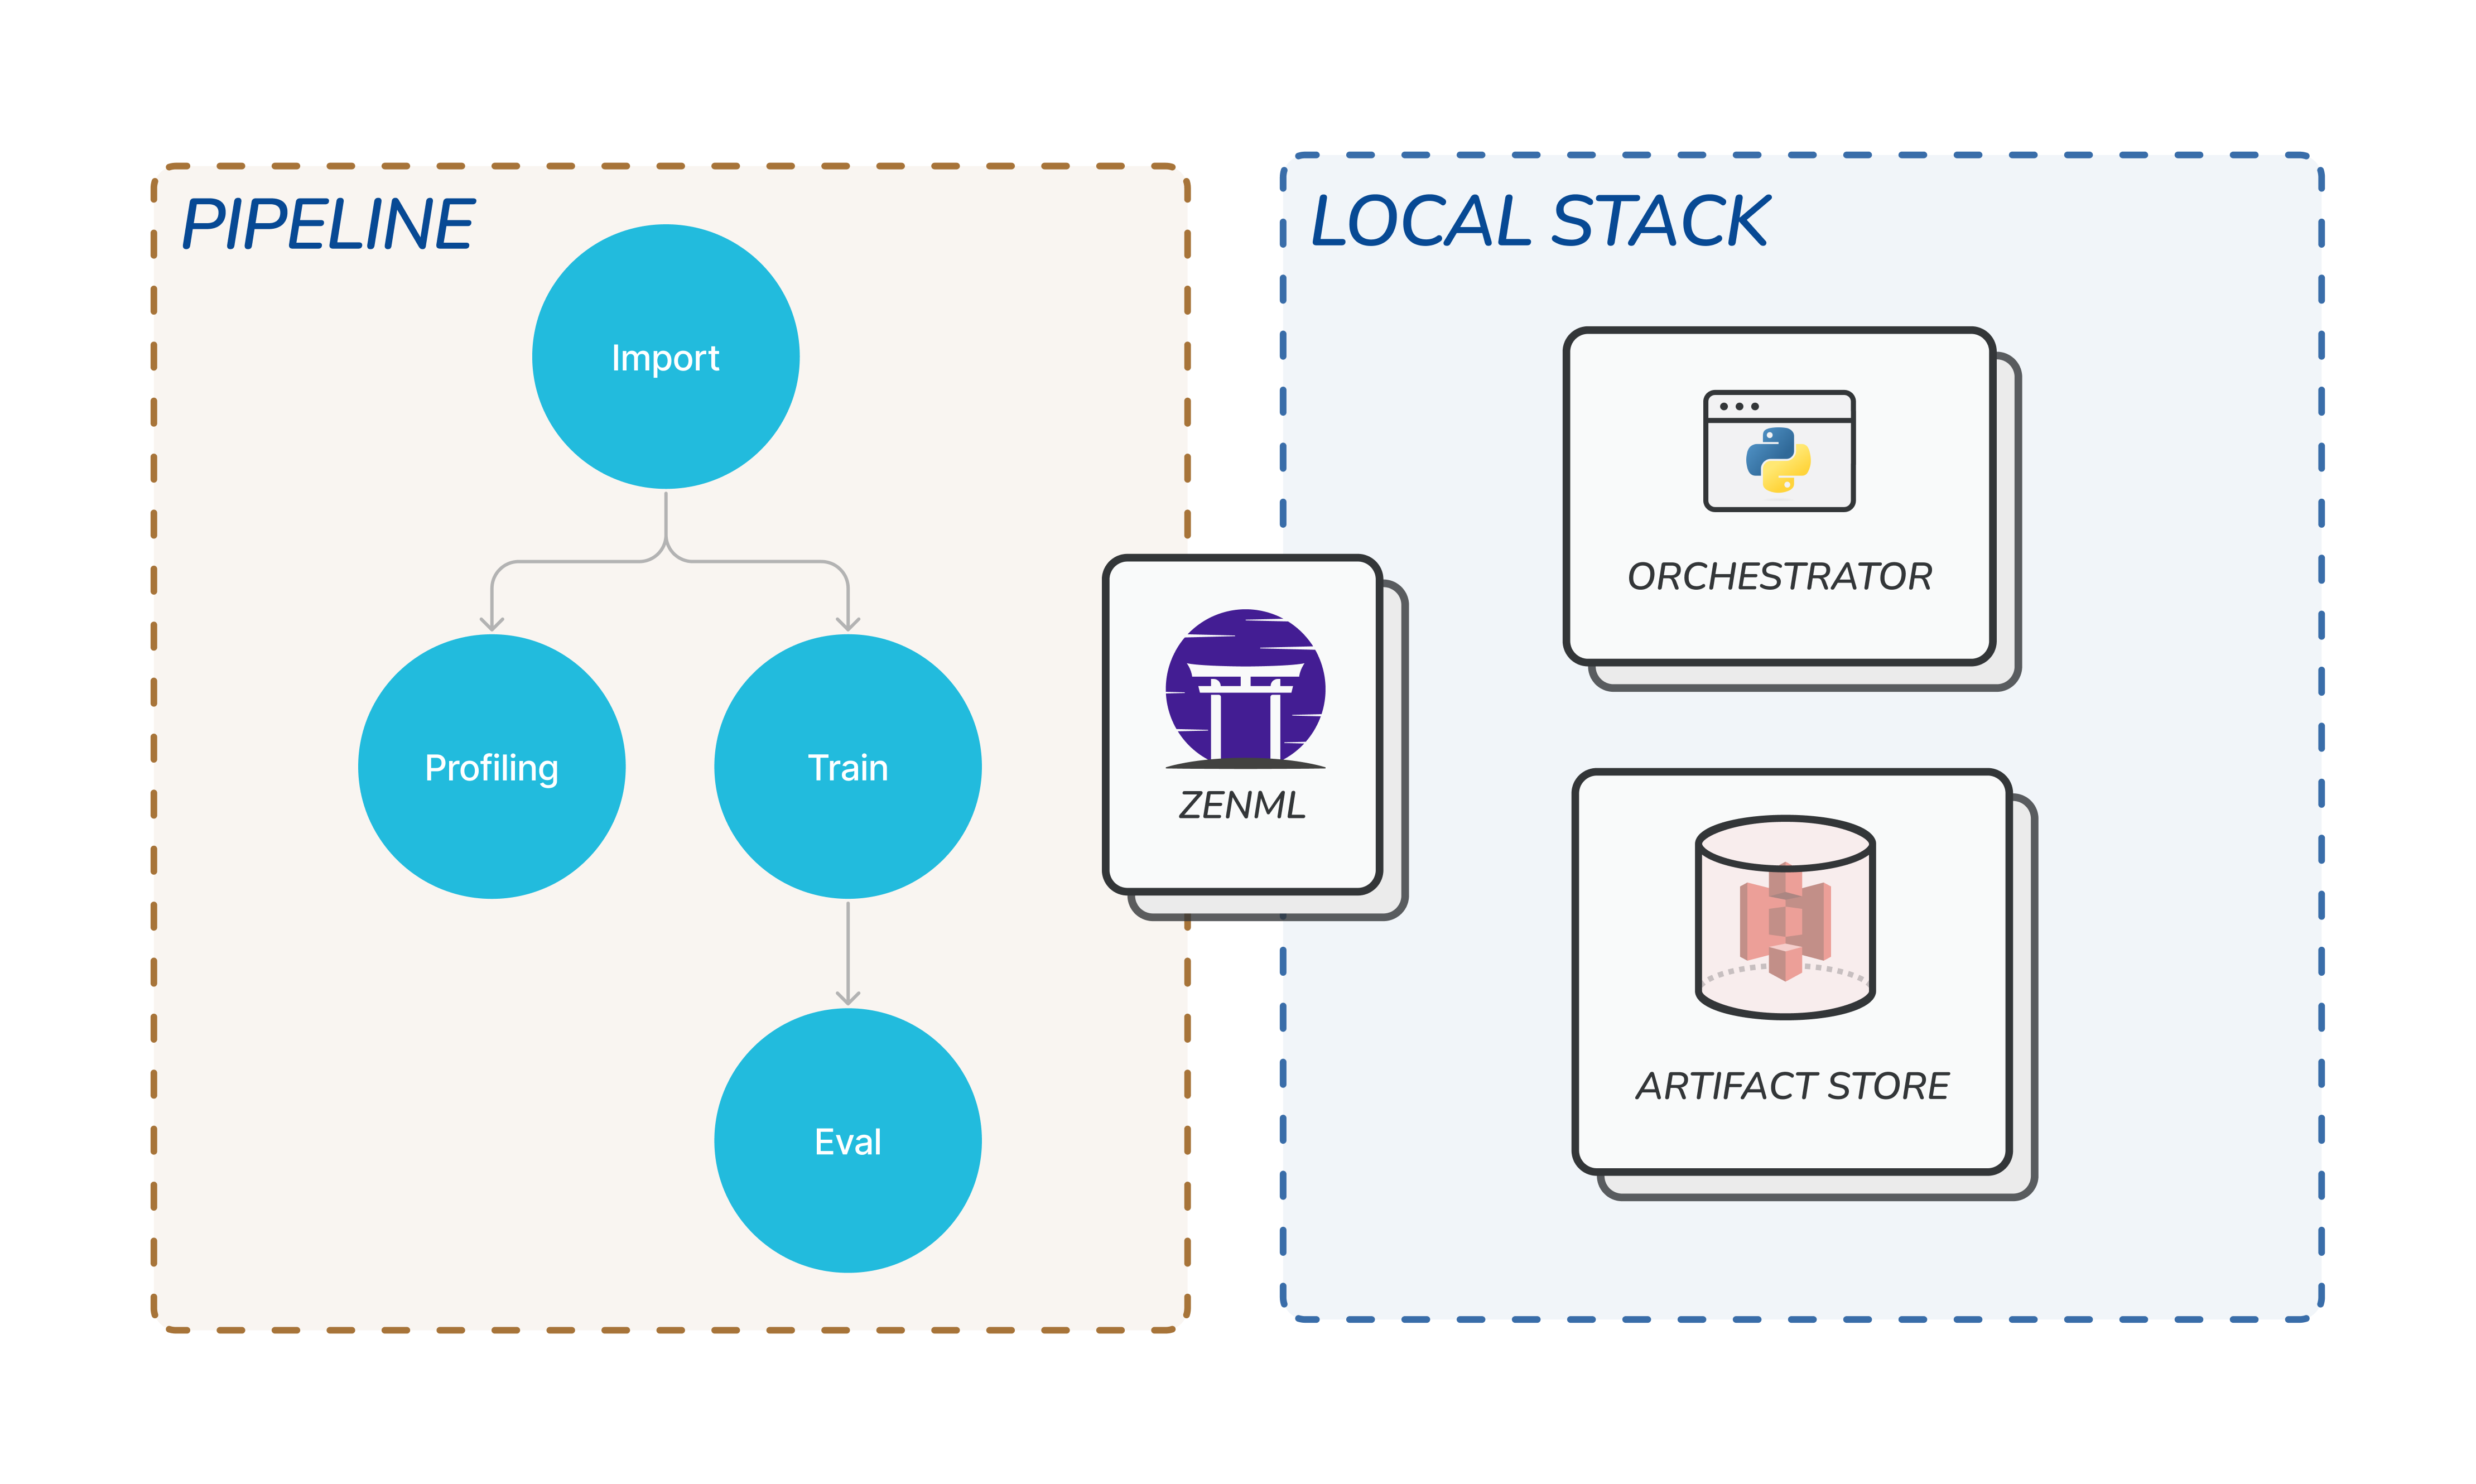

A stack allows ZenML to separate code from infrastructure. This means, that it is easy to switch the environment that the pipeline runs on without making changes to the code. 

Let's take a look at the current active stack. You will find that you are running a default stack which comes with a local [orchestrator](https://docs.zenml.io/stacks-and-components/component-guide/orchestrators) and a local [artifact store](https://docs.zenml.io/stacks-and-components/component-guide/artifact-stores). Discover more about stack components [here](https://docs.zenml.io/stacks-and-components/component-guide).

In [1]:
!zenml stack describe

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
        Stack Configuration        
┏━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┓
┃ COMPONENT_TYPE │ COMPONENT_NAME ┃
┠────────────────┼────────────────┨
┃ ARTIFACT_STORE │ default        ┃
┠────────────────┼────────────────┨
┃ ORCHESTRATOR   │ default        ┃
┗━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┛
     'default' stack (ACTIVE)      
⠋ Describing the stack...
Stack 'default' with id '3fb3b730-9472-489a-988a-28ffc426dced' is unowned.
⠋ Describing the stack...
⠋ Describing the stack...

You can display various ZenML entities including pipelines, runs, stacks and 
much more on the ZenML Dashboard. You can try it locally, by running `zenml up`,
or remotely, by deploying ZenML on the infrastructure of your choice.


### Let's go step-by-step

A ZenML pipeline is built up of several steps. Each step can be defined as a Python function which can either take in inputs from other steps, or directly from the pipeline or user.

![](image.jpg)

Our pipeline will consist of the following steps:

- **URL Scraper**: This step will scrape the URLs of the documentation that we pass through it. It will return a list of URLs to load.

- **Web URL Loader**: This step will load the HTML content of the URLs passed through it. It will return a list of Documents.

- **Index Generator**: This step will generate an index of the documents passed through it. It will return a vector store collection.

- **Agent Creator**: This step takes in the vector store and returns a LangChain AgentExecutor which we can run queries against.

### The URL Scraper

All that you need to do to convert a simple python function into a ZenML step is add the `@step` decorator.
Adding this decorator tells ZenML to
- allow this function to be passed in as a pipeline step.
- track and version the outputs of this step in your active artifact store (configured by the ZenML Stack).
- allow additional options like enabling cache, setting remote execution environments for the step and more!

In [2]:
from typing import List

from steps.agent_creation.url_scraper.url_scraping_utils import get_all_pages, get_nested_readme_urls
from zenml import step


@step(enable_cache=True)
def url_scraper(
    docs_url: str = "",
    repo_url: str = "",
    release_notes_url: str = "",
    website_url: str = "",
) -> List[str]:
    """Generates a list of relevant URLs to scrape.

    Args:
        docs_url: URL to the documentation.
        repo_url: URL to the repository.
        release_notes_url: URL to the release notes.
        website_url: URL to the website.

    Returns:
        List of URLs to scrape.
    """
    # examples_readme_urls = get_nested_readme_urls(repo_url)
    # docs_urls = get_all_pages(docs_url)
    # website_urls = get_all_pages(website_url)
    # return docs_urls
    # return docs_urls + website_urls + [release_notes_url]
    return [website_url]

### The Web URL Loader

This step makes use of the UnstructuredURLLoader wrapper from LangChain to load the URLs as documents.

You can import any libraries that you would want to use and use it inside a step definition. Running it locally only requires that you have the library installed on your environment. When you want to run on a remote stack, you can either choose to allow ZenML to derive dependencies from your local envrionment, or pass in the requirements explicitly (more on this later).

In [3]:
from llama_index.schema import Document
from llama_hub.web.unstructured_web import UnstructuredURLLoader


@step(enable_cache=True)
def web_url_loader(urls: List[str]) -> List[Document]:
    """Loads documents from a list of URLs.

    Args:
        urls: List of URLs to load documents from.

    Returns:
        List of langchain documents.
    """
    loader = UnstructuredURLLoader(
        urls=urls,
    )
    return loader.load_data()

### The Index Generator

Here, we use FAISS as our vector store of choice, along with OpenAI embeddings to generate a collection from the documents passed from the previous step.

You can also choose some other store as you wish; the step implementation will change but the rest of the pipeline will stay the same. You can also choose to create a new function and then pass that to the pipeline instead of the one we have here. This way, ZenML allows you to easily switch between implementations without trouble.

In [4]:
from typing import Optional
from sentence_transformers import SentenceTransformer

# initialize simple vector indices
from llama_index import VectorStoreIndex, ServiceContext
from llama_index.embeddings.openai import OpenAIEmbedding


@step(enable_cache=True)
def index_generator(
    documents: List[Document], model: Optional[SentenceTransformer] = None
) -> VectorStoreIndex:
    if model is None:
        embed_model = OpenAIEmbedding()
    else:
        # write model to a file in current directory
        model.save("./finetuned_model")
        embed_model = "local:finetuned_model"

    service_context = ServiceContext.from_defaults(embed_model=embed_model)
    return VectorStoreIndex.from_documents(
        documents=documents, service_context=service_context
    )

### The Agent Creator

With the agent creator, we define:
- a VectorStoreQATool from LangChain's set of available tools, with the vector store we created in the previous step.
- a LangChain agent with some custom prompts. This is done to customize the personality of the agent and make it identify as a ZenML bot. You can also play around with the prompt to change how the agent talks (think pirate, shakespeare, etc.).
- a LangChain AgentExecutor which we can use to run queries against the agent. This AgentExecutor acts like a middleman facilitating communication between the LLM and the tools.


In [5]:
import logging

from agent.prompt import PREFIX
from zenml import step


from llama_index import VectorStoreIndex
from llama_index.agent import OpenAIAgent
from llama_index.tools import QueryEngineTool, ToolMetadata

PIPELINE_NAME = "zenml_agent_creation_pipeline"


@step(enable_cache=False)
def agent_creator(vector_store: VectorStoreIndex) -> OpenAIAgent:
    """Create an agent from a vector store.

    Args:
        vector_store: Vector store to create agent from.

    Returns:
        An OpenAIAgent.
    """
    tools = [
        QueryEngineTool(
            query_engine=vector_store.as_query_engine(),
            metadata=ToolMetadata(
                name="zenml",
                description="Use this tool to answer questions about ZenML. "
                "How to debug errors in ZenML, how to answer conceptual "
                "questions about ZenML like available features, existing abstractions, "
                "and other parts from the documentation.",
            ),
        ),
    ]

    my_agent = OpenAIAgent.from_tools(tools=tools, system_prompt=PREFIX, verbose=True)
    logging.info("Agent created.")

    return my_agent


#### Custom Materializer

You may notice that we have specified an `output_materializer` in the step decorator. A [materializer](https://docs.zenml.io/user-guide/advanced-guide/artifact-management/handle-custom-data-types) in ZenML is what defines how an object is serialized and deserialized while moving between steps. ZenML comes with a host of built-in materializers that include basic types, collections and pydantic objects, along with a default cloudpickle materializer. 

You can also define your own custom materializers. Here, we are using a custom materializer (defined in the agent/ directory) for the AgentExecutor type, which is a pydantic object that doesn't have a `.json()` implementation. 
Instead of passing it in the decorator, you can also simply specify the data type a materializer can handle while defining it and ZenML will pick it up automatically and match any relevant output types to it.

### Creating a ZenML pipeline

A [pipeline](https://docs.zenml.io/user-guide/starter-guide/create-an-ml-pipeline) is where you chain all the steps together. The order of execution is determined by the relationship between outputs and inputs across steps. You can also choose to add explicit dependencies using `.after()` and `.before()`.

The output of each step is tracked and versioned in the artifact store that you configure in your ZenML stack (local, by deafult). ZenML does the heavy-lifting of making sure that the right data is available to the step that needs it.

In [6]:
from zenml import pipeline, get_pipeline_context
from zenml.artifacts.external_artifact import ExternalArtifact
from zenml.model.model_version import ModelVersion

@pipeline(
    name=PIPELINE_NAME,
    enable_cache=True,
    model_version=ModelVersion(
        name="finetuned-sentence-transformer",
    ),
    extra={"trained_embeddings": "finetuned-sentence-transformer"},
)
def docs_to_agent_pipeline(
    docs_url: str = "",
    repo_url: str = "",
    release_notes_url: str = "",
    website_url: str = "",
) -> None:
    """Generate index for ZenML.

    Args:
        docs_url: URL to the documentation.
        repo_url: URL to the repository.
        release_notes_url: URL to the release notes.
        website_url: URL to the website.
    """
    urls = url_scraper(docs_url, repo_url, release_notes_url, website_url)
    documents = web_url_loader(urls)
    trained_embeddings = get_pipeline_context().extra["trained_embeddings"]
    vector_store = index_generator(
        model=ExternalArtifact(
            name=trained_embeddings,
        ),
        documents=documents,
    )
    agent = agent_creator(vector_store=vector_store)

### 🚀 Running the pipeline with the ZenML Docs and website data.

You can run a pipeline by simply calling the pipeline function with your parameters. In the block below, we pass in URLs specific to ZenML to create an index based on ZenML data. Feel free to use the URLs of your favorite tools to create an index of your own! 🧑‍🍳

In [7]:
import os

os.environ["OPENAI_API_KEY"] = ""

In [8]:
version = "0.47.0"
docs_url = f"https://docs.zenml.io/v/{version}/"
website_url = "https://zenml.io"
repo_url = f"https://github.com/zenml-io/zenml/tree/{version}/examples"
release_notes_url = f"https://github.com/zenml-io/zenml/blob/{version}/RELEASE_NOTES.md"

docs_to_agent_pipeline(
    website_url=website_url,
    docs_url=docs_url,
    repo_url=repo_url,
    release_notes_url=release_notes_url,
)

Using an external artifact as step input currently invalidates caching for the step and all downstream steps. Future releases will introduce hashing of artifacts which will improve this behavior.
Initiating a new run for the pipeline: zenml_agent_creation_pipeline.
Registered new version: (version 2).
New model version 13 was created.
Executing a new run.
Using user: default
Using stack: default
  artifact_store: default
  orchestrator: default
Caching enabled explicitly for url_scraper.
Step url_scraper has started.
Implicitly linking artifact output to model finetuned-sentence-transformer version 13.
Step url_scraper has finished in 0.293s.
Caching enabled explicitly for web_url_loader.
Step web_url_loader has started.
Reading document from string ...
Reading document ...
Implicitly linking artifact output to model finetuned-sentence-transformer version 13.
Step web_url_loader has finished in 4.863s.
Caching enabled explicitly for index_generator.
Step index_generator has started.
Sa

### ZenML Dashboard

Start the ZenML Dashboard by running the code below. You can view all your pipelines, stacks, stack components and much more, all in one place!

In [17]:
!zenml down
!zenml up --blocking

Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
The local ZenML dashboard is not running.
Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
Deploying a local ZenML server with name 'local'.
Starting ZenML Server as blocking process... press CTRL+C once to stop it.
INFO:     Started server process [5304]
Started server process [5304]
INFO:     Waiting for application startup.
Waiting for application startup.
INFO:     Application startup complete.
Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8237 (Press CTRL+C to quit)
Uvicorn running on http://127.0.0.1:8237 (Press CTRL+C to quit)
INFO:     127.0.0.1:51274 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:51274 - "GET /css/main.90d3ff14.chunk.css HTTP/1.1" 304 Not Modified
INFO:     127.0.0.1:51276 - "GET /css/2.5b37d44a.chunk.css HTTP/1.1" 304 Not M

### 🧪 Testing the Agent

ZenML tracks and versions artifacts from all steps across all pipeline versions. This makes it really easy to pick up a specific version of your desired output and test it. You can also have a pipeline that compares models/outputs from different versions and picks the best one! The possibilities are endless 😉


By default when you call the `get_pipeline` function on the ZenML client, it gets you the latest pipeline version model. Here, we look into the `agent_creator` step and load its output for testing.

In [11]:
from zenml.client import Client

pipeline_model = Client().get_pipeline(name_id_or_prefix=PIPELINE_NAME)

# you can additionally pass in the version if you want
# to move between different pipeline implementations.
# pipeline_model = Client().get_pipeline(
#     name_id_or_prefix=PIPELINE_NAME, version="9"
# )

if pipeline_model.runs is not None:
    # get the last run
    last_run = pipeline_model.runs[0]
    # get the agent_creator step
    agent_creator_step = last_run.steps["agent_creator"]

    try:
        agent = agent_creator_step.output.load()
        materializer = agent_creator_step.output.materializer

        # existing_tools = agent.tools
    except ValueError:
        print("No existing agent found.")

Now that we have the retrieved the agent from a previous run, let's test it by
asking it some questions. Feel free to customize the prompt to your liking!

In [46]:
agent.chat("Who are you?")

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


AgentChatResponse(response='I am ZenML Agent, a large language model operated by ZenML. I am designed to assist with a wide range of tasks and provide information and insights on various topics, including ZenML itself. How can I assist you today?', sources=[], source_nodes=[])

In [52]:
agent.chat("What is an orchestrator in ZenML 0.47.0?")


STARTING TURN 1
---------------



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
=== Calling Function ===
Calling function: zenml with args: {
"input": "orchestrator"
}


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Got output: An orchestrator, in the context of ML workflows, refers to a component or tool that is responsible for managing and coordinating the various steps and components involved in the ML pipeline. It ensures that the different tasks, such as data preprocessing, model training, and deployment, are executed in the correct order and with the necessary dependencies. The orchestrator plays a crucial role in streamlining the ML workflow and ensuring the smooth integration of different components, such as data stores, providers, and tools.

STARTING TURN 2
---------------

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


AgentChatResponse(response='In ZenML 0.47.0, the orchestrator is a core component that manages and coordinates the execution of ML pipelines. It provides a high-level interface for defining and running pipelines, allowing users to easily define the steps and dependencies of their ML workflows.\n\nThe orchestrator in ZenML 0.47.0 is designed to be flexible and extensible, allowing users to integrate with various ML tools and frameworks. It supports different execution backends, such as local execution, distributed execution, and cloud-based execution, enabling users to run their pipelines in different environments.\n\nThe orchestrator in ZenML 0.47.0 also provides features for versioning and lineage tracking, allowing users to track the inputs, outputs, and dependencies of each step in the pipeline. This helps in ensuring reproducibility and traceability of ML experiments.\n\nOverall, the orchestrator in ZenML 0.47.0 is a powerful tool for managing and executing ML pipelines, providing 